<a href="https://colab.research.google.com/github/theorignalmapdcodex/aipi590_i-3_et1/blob/main/notebooks/gpt2%2Bshap_local_interpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

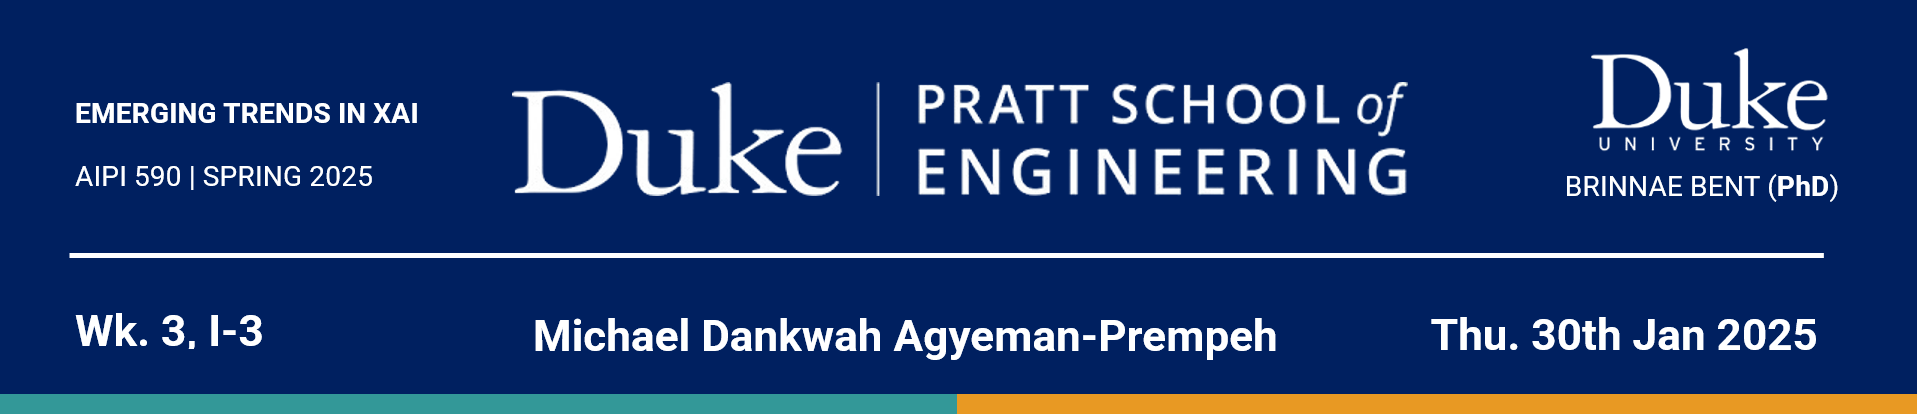
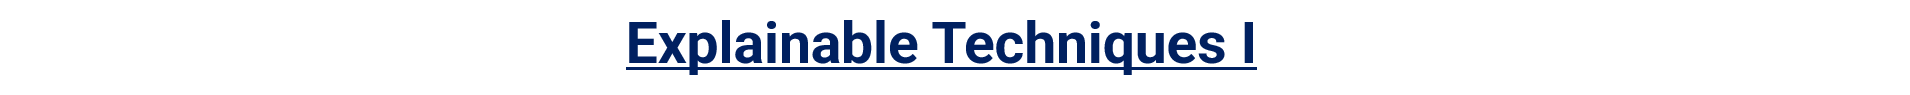

>#### 🔗 **1. GitHub Links:**
- Click [here](https://github.com/theorignalmapdcodex/aipi590_i-3_et1/blob/main/notebooks/bert_local_interpretability_v3.ipynb) to access the *GitHub repository ipynb* file for this assignment.

## 🥅 **Project Goal:**
### *To utilize SHAP to identify and visualize the influence of specific words and phrases within paragraph-length text on GPT-2's generation of biased or unbiased outputs related to nationality. This analysis will help us understand and potentially mitigate gender biases present in the model's learned representations and generated text.*

<br>

---

<br>

- ### **Why GPT-2 as model of choice for text prediction and not BERT for example:**
Text goes here

--------------------------------------------------------------------------------

In [40]:
# To ignore warnings for code output to look clean
import warnings
warnings.filterwarnings("ignore")

In [41]:
# import os

# # Remove Colab default sample_data
# !rm -r ./sample_data

# # Clone GitHub files to colab workspace
# repo_name = "aipi590_i-3_et1"
# git_path = 'https://github.com/theorignalmapdcodex/aipi590_i-3_et1.git' # Change to your path
# !git clone "{git_path}"

# # Change working directory to location of notebook
# notebook_dir = 'notebooks'
# path_to_notebook = os.path.join(repo_name,notebook_dir)
# %cd "{path_to_notebook}"
# %ls

## 📚 **I. Libraries & Packages Installation**

In [42]:
!pip install transformers shap

In [43]:
#1 Importing for usage of SHAP and GPT-2
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
import numpy as np
import shap

## ⚙️ **III. Setting Up Functions to Predict/Score and Visuialize**

## 💻 **IV. Initializing GPT-2 and setting up process required to tokenize text**

In [44]:
# Load pre-trained GPT-2 tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("gpt2", use_fast=True)
model = AutoModelForCausalLM.from_pretrained("gpt2")

In [45]:
# Setting model decoder to true
model.config.is_decoder = True
# Setting text-generation params under task_specific_params
model.config.task_specific_params["text-generation"] = {
    "do_sample": True,
    "max_length": 50,
    "temperature": 0.7,
    "top_k": 50,
    "no_repeat_ngram_size": 2,
}

## ✨ **V. Trying to Analyze Bias in Nationality Based-Perception of GPT-2 model with SHAP values**

In [46]:
firsttext_to_analyse = ["An immigrant was speaking in the meeting when"]
secondtext_to_analyse = ["A local citizen was speaking in the meeting when"]

                #---- Other sentences to test with ----#
# firsttext_to_analyse = ["A doctor was examining a patient and later complained of pain in."]
# secondtext_to_analyse = ["A nurse was examining a patient and later complained of pain in."]

# firsttext_to_analyse = ["A White young master was talking to his servsnt."]
# secondtext_to_analyse = ["The CEO traveled with his female assistant."]

> ### **a. i.) <mark>Viz #1</mark>: ----**

In [47]:
explainer = shap.Explainer(model, tokenizer)
viz1gen_shap_values = explainer(firsttext_to_analyse)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  0%|          | 0/210 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:52, 52.40s/it]               


In [48]:
shap.plots.text(viz1gen_shap_values)

In [49]:
print(viz1gen_shap_values)

.values =
array([[[-2.99468996e-01,  1.52772988e+00,  8.93814433e-02,
          1.52547949e-01,  2.60517187e-01,  3.47778409e-01,
          2.06969124e-01, -5.03543522e-02,  1.35900509e-01,
          7.34646760e-02, -6.81620368e-02,  1.31058309e-02,
         -8.76962496e-02,  9.52493257e-02, -1.24443601e-01,
          1.71264077e-01, -9.54768245e-02,  7.34385173e-02,
          7.03886117e-02,  1.72976666e-02],
        [-2.44719125e-01,  7.70414327e-02,  1.00530639e-01,
          2.05420716e+00, -1.34162209e-01, -1.05070133e-01,
          8.91269518e-02,  1.82680364e-03, -5.07301106e-02,
         -1.83667749e-01,  1.97161356e-03,  6.82582381e-02,
         -9.92857095e-02, -2.45485744e-02,  6.55858310e-02,
          2.26731344e-01, -6.01783342e-02,  1.62970265e-03,
         -3.95529088e-02,  1.22774551e-01],
        [ 6.24840183e-02,  2.34284367e-01,  1.59497708e-01,
          2.35171353e-01,  3.37650195e-01,  8.63089865e-02,
          2.21246486e-01,  1.68044317e-01, -8.47615304e-03,
  

> ### **a. ii.) Interpretation of <mark>Viz #1</mark>**
Text goes here

---

> ### **b. i.) <mark>Viz #2</mark>: ----**

In [50]:
explainer = shap.Explainer(model, tokenizer)
viz2gen_shap_values = explainer(secondtext_to_analyse)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  0%|          | 0/210 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:41, 41.09s/it]               


In [51]:
print(viz2gen_shap_values)

.values =
array([[[-1.95245090e-01,  1.57144956e+00,  1.30348060e-01,
          2.03293498e-01,  3.30451939e-01,  9.06839611e-02,
         -1.14230608e-01,  1.79932951e-01,  1.32681687e-01,
          5.94502961e-02, -6.47432404e-02,  3.55574084e-02,
         -6.24075194e-02, -2.41494234e-02, -8.01474627e-03,
          6.62003346e-02,  1.39844473e-01,  9.10652530e-02,
          2.45922608e-02, -6.34065481e-02],
        [-2.94231608e-01,  2.23056828e-01, -6.49641980e-02,
          3.76554531e+00, -1.33201325e-01,  2.35372671e-01,
         -2.98915054e-02,  9.84691297e-02, -3.06435456e-01,
          4.77387977e-02, -2.75605923e-01,  2.75790332e-02,
          7.00658344e-02,  1.02627546e-01,  2.61609054e-02,
          4.03792440e-02,  1.00580626e-02,  1.21596766e-01,
          7.05336835e-02, -1.46809565e-01],
        [ 5.02928410e-02,  2.47663441e-01,  2.11817648e-01,
          3.33784240e-01,  1.90092765e-01, -7.94421427e-02,
          8.75164317e-03, -1.94065462e-02,  3.49873954e-02,
  

In [52]:
shap.plots.text(viz2gen_shap_values)

> ### **b. ii.) Interpretation of <mark>Viz #2</mark>**
Text goes here

---

## ❓ **Why SHAP over LIME and Anchor:**
## *Strengths:*

#### Text goes here

<br>



<br>

## *Limitations:*

#### Text goes here

--------------------------------------------------------------------------------

## 🔚 **Conclusion:**
## *Way Forward and What Can be Done to Improve Approach:*

#### Text goes here

